In [1]:
import numpy as np
import math
import cv2
from matplotlib import pyplot as plt

#### Загрузим изображение и сделаем его вывод:

In [2]:
image = cv2.imread("D:\\comp_vision_image\\lena.png")


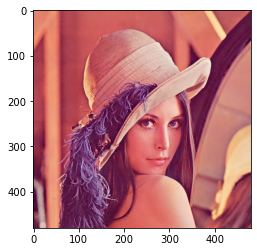

In [3]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

### Найдем лицо на изображении:


In [4]:
face_cascade = cv2.CascadeClassifier("D:\\Anaconda\\pkgs\\libopencv-4.0.1-hbb9e17c_0\\Library\\etc\\haarcascades\\haarcascade_frontalface_default.xml")
face = face_cascade.detectMultiScale(image)
print(len(face))

1


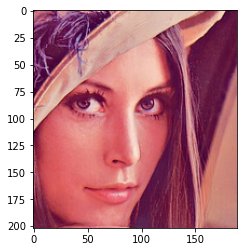

In [5]:
crop_img = image[face[0][2]:face[0][0] + face[0][3], face[0][0]:face[0][0] + face[0][1]] 

plt.imshow(cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB))

###  Получим бинарное изображение краев (границ объекта):

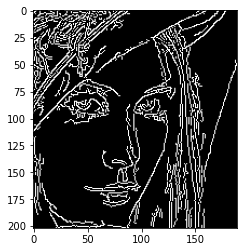

In [6]:
img2 = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(img2, 50, 150)
plt.imshow(edges, cmap="gray")

### Удалим мелкие границы, у которых длина и ширина меньше 10:

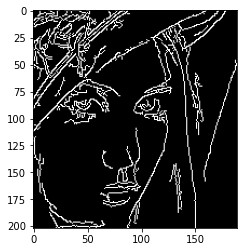

In [7]:
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
new_contoures = []
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if w >= 10 and h >= 10:
        new_contoures.append(c)
maskk = np.zeros_like(edges)
cv2.drawContours(maskk, new_contoures, -1, (255, 255, 255), cv2.FILLED)
edges = cv2.bitwise_and(edges, edges, mask = maskk)
plt.imshow(edges, cmap="gray")

### Применим морфологическую операцию расширения:

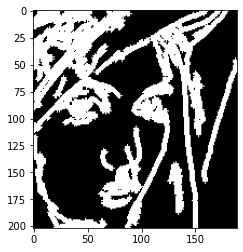

In [8]:
kernel = np.array([
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0],
    [1, 1, 1, 1, 1],
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0],
], dtype=np.uint8)
dilated = cv2.dilate(edges, kernel, 1)

plt.imshow(dilated,cmap="gray")

### Сгладим полученное изображение краёв гауссовским фильтром:

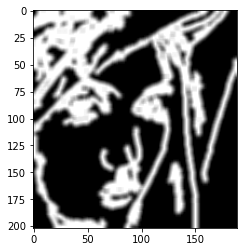

In [9]:
imgGauss=cv2.GaussianBlur(dilated,(5,5), cv2.BORDER_DEFAULT)
plt.imshow(imgGauss, cmap="gray")

### Получим нормализованное изображение:

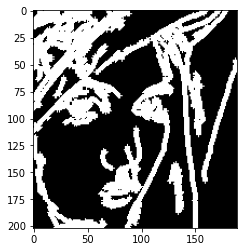

In [10]:
M = cv2.normalize(dilated, None, 0, 1, cv2.NORM_MINMAX, cv2.CV_32F)
plt.imshow(cv2.cvtColor(M , cv2.COLOR_BGR2RGB))

### Получим изображение с примененной билатеральной фильтрацией:

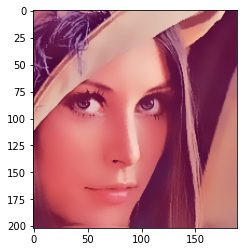

In [11]:
f1 = cv2.bilateralFilter(crop_img, 15, 60, 90)
plt.imshow(cv2.cvtColor(f1 , cv2.COLOR_BGR2RGB))

### Получим изображение с увеличенной резкостью:

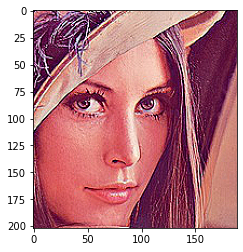

In [12]:
sup = np.array([[0, -1, 0],
[-1, 5, -1],
[0, -1, 0]])
f2 = cv2.filter2D(crop_img, -1, sup)
plt.imshow(cv2.cvtColor(f2, cv2.COLOR_BGR2RGB))

### Осуществим финальную фильтрацию по формуле:

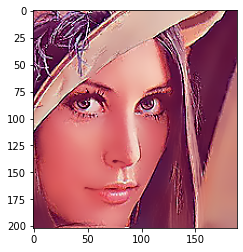

In [13]:
result = np.zeros(crop_img.shape, dtype=np.uint8)
w, h, c = result.shape
for i in range(w):
    for j in range(h):
        for k in range(c):
            result[i, j, k] = M[i, j] * f2[i, j, k] + (1 - M[i, j]) * f1[i, j, k]
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))